In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Load the dataset
df = pd.read_csv('Crowd data for anomaly detection.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


# EDA Analysis

In [4]:
# Summary Statistics 
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,0.857201
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [5]:
# Generate descriptive statistics
df.describe(include='all')

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
count,24123,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123,24123.000000
unique,3587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,0:59:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17152,NaN
mean,NaN,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,NaN,0.509265
std,NaN,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,NaN,0.857201
min,NaN,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,NaN,0.000000
25%,NaN,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,NaN,0.000000
50%,NaN,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,NaN,0.000000
75%,NaN,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,NaN,1.000000


In [6]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


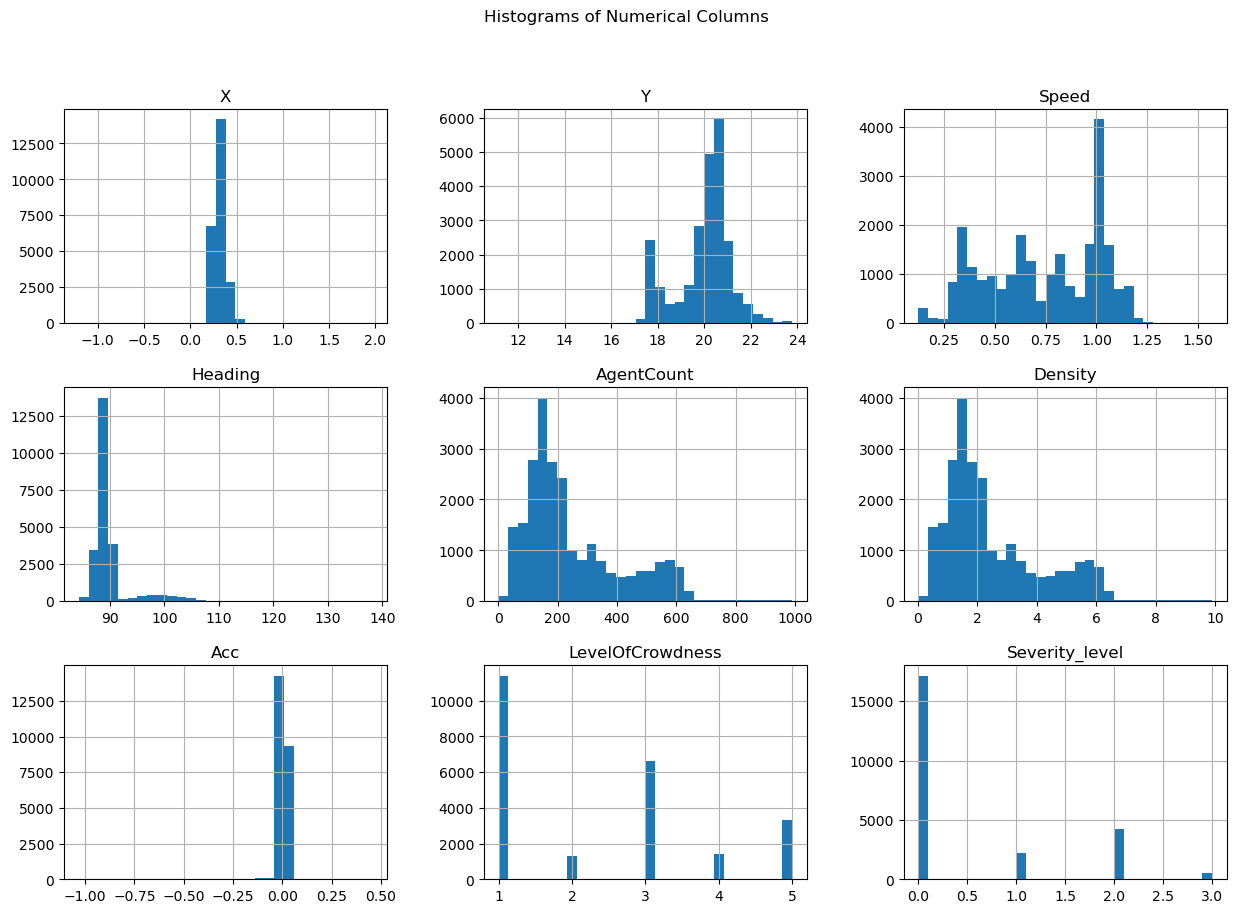

In [7]:
import seaborn as sns
# List of numerical columns
numerical_columns = ['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'Severity_level']

# Plot histograms for numerical columns
df[numerical_columns].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Columns')
plt.show()

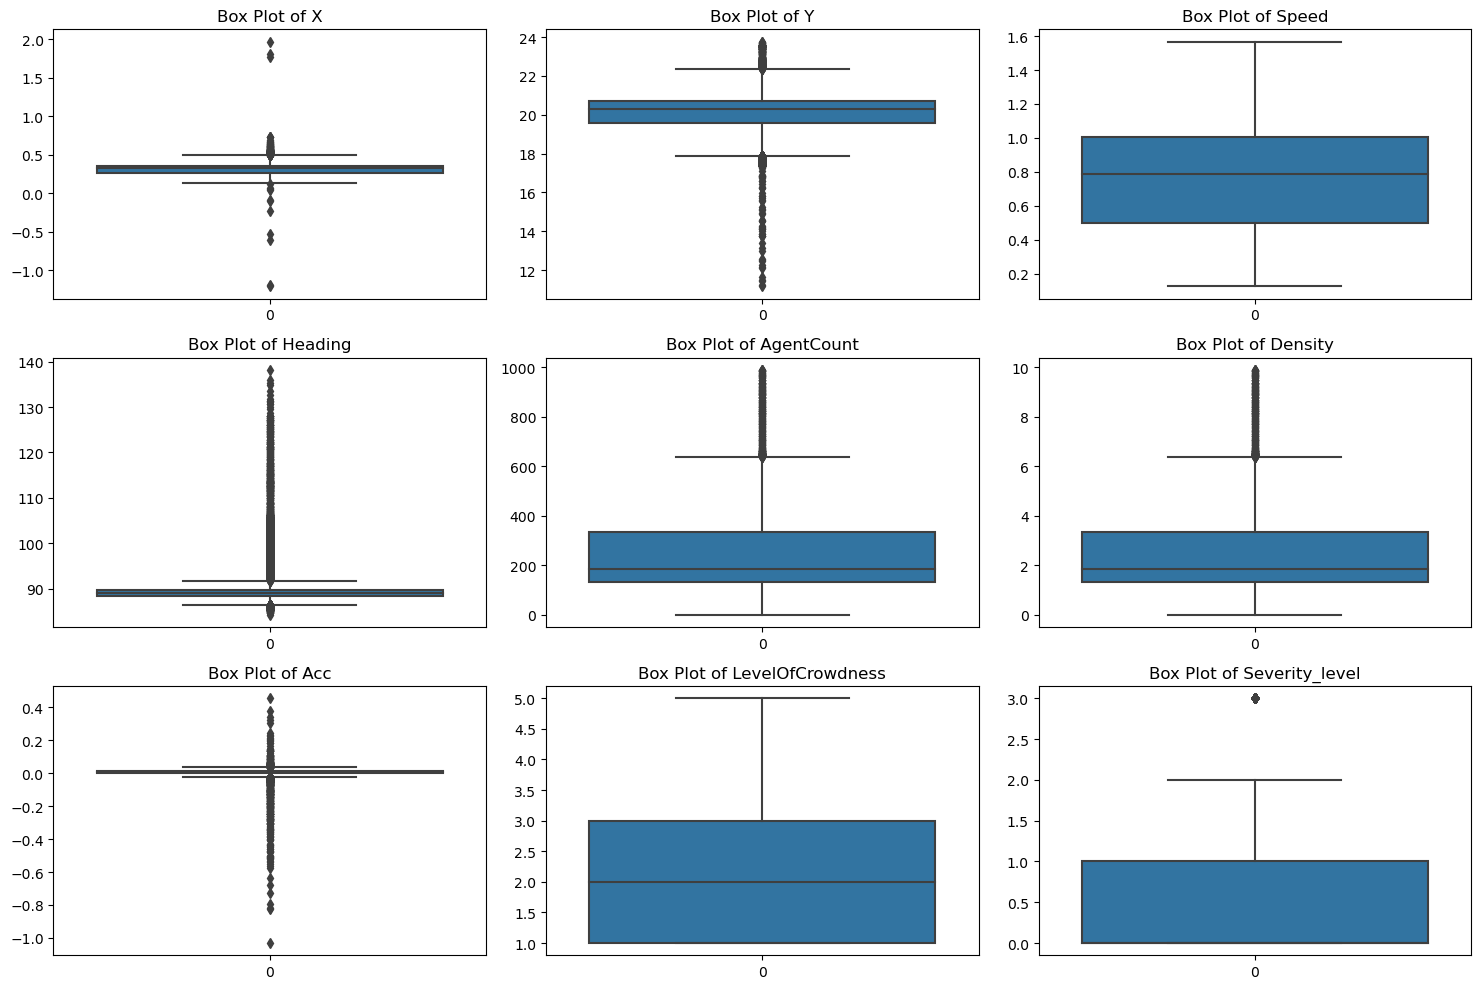

In [8]:
# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

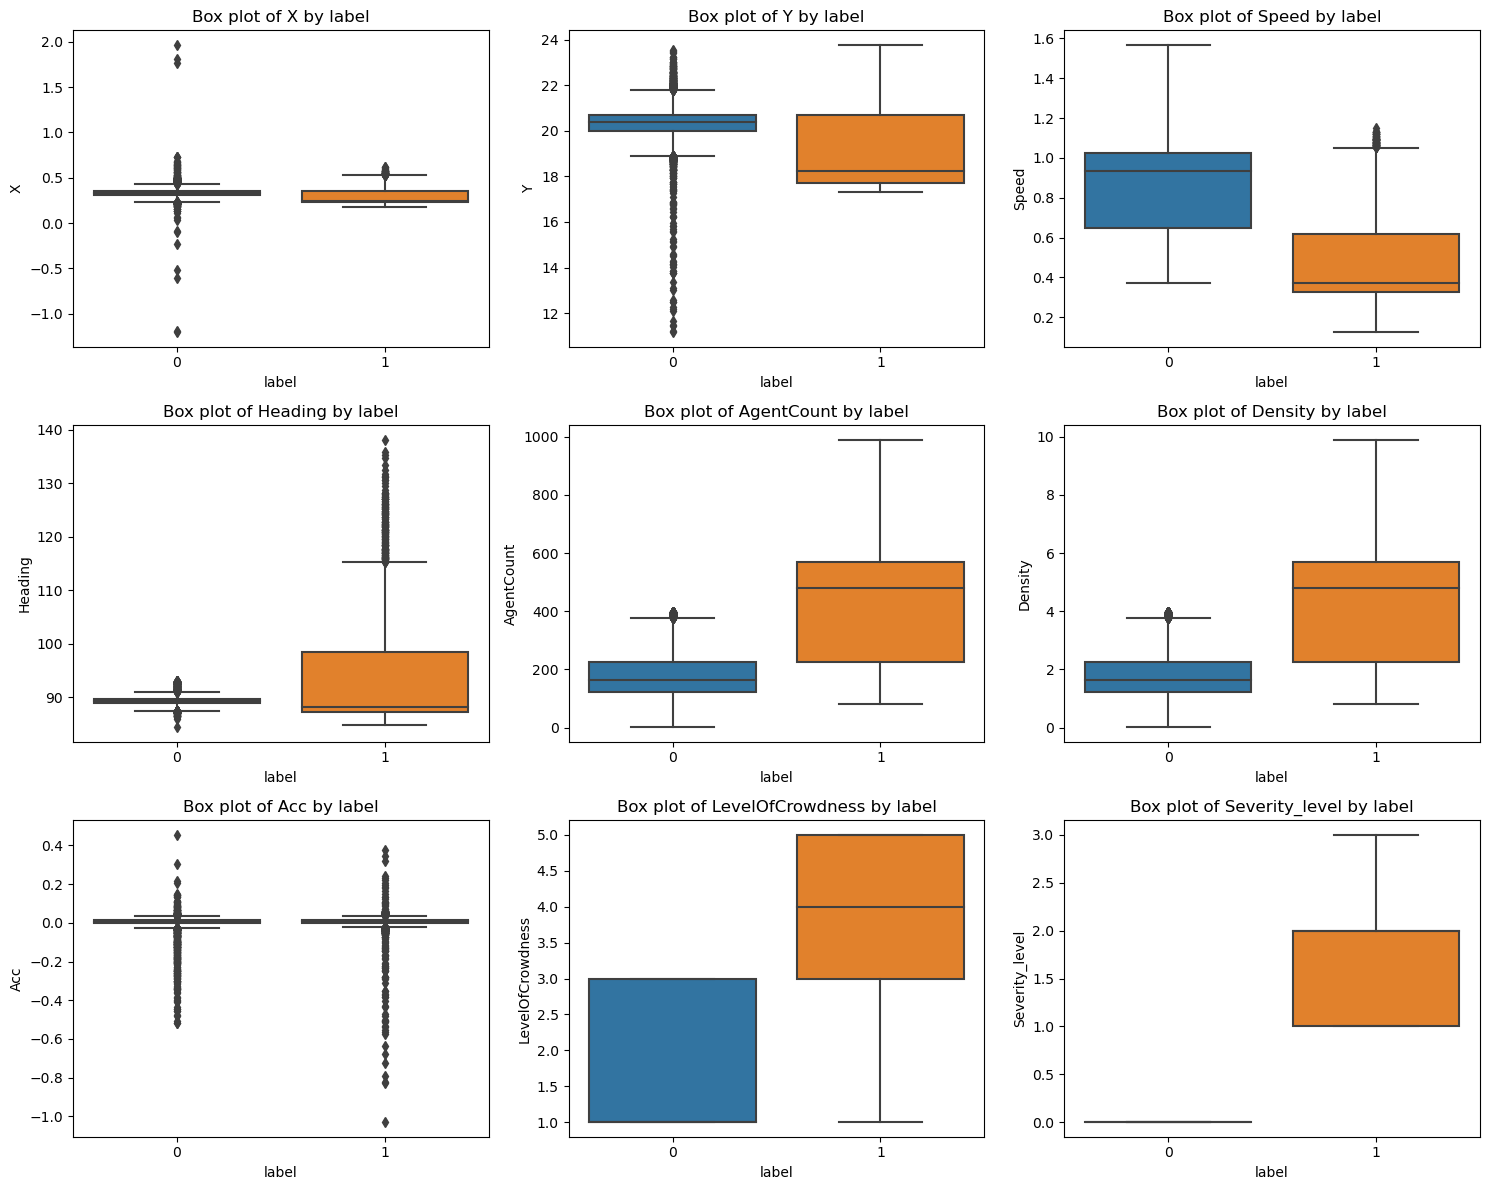

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for box plots
numerical_cols = ['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'Severity_level']

# Create box plots using matplotlib and seaborn
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'Box plot of {col} by label')

plt.tight_layout()
plt.show()


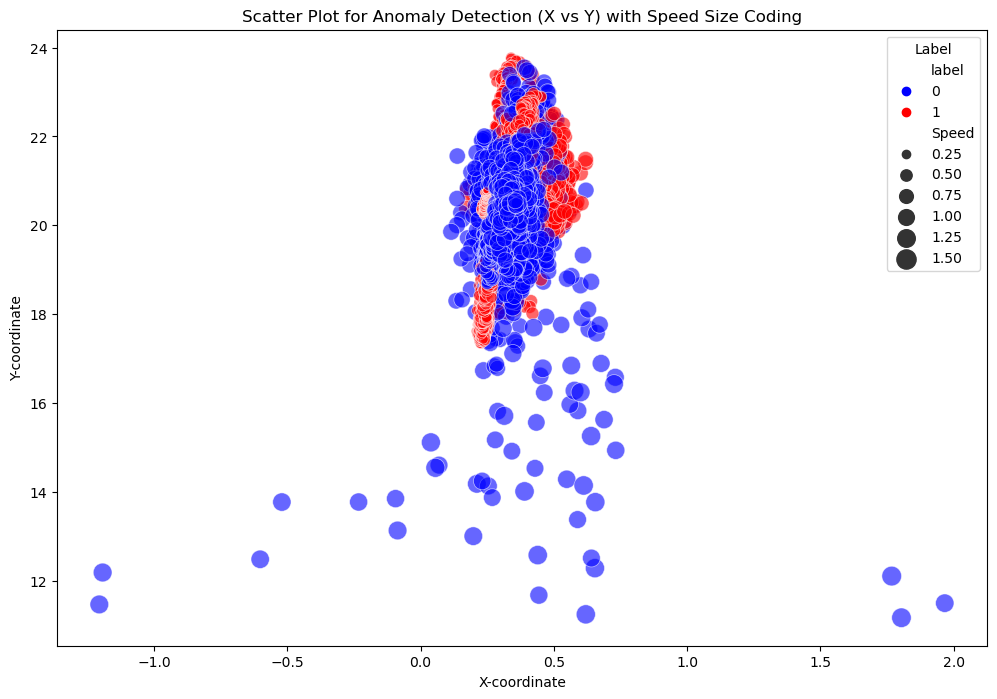

In [10]:
# Scatter plot for anomaly detection with Speed as color coding
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='label', size='Speed', sizes=(20, 200), data=df, palette=['blue', 'red'], alpha=0.6)
plt.title('Scatter Plot for Anomaly Detection (X vs Y) with Speed Size Coding')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend(title='Label', loc='upper right')
plt.show()

In [11]:
# Example: Creating a 'Category' column based on some conditions
df['Category'] = np.where(df['AgentCount'] > 10, 'High', 'Low')

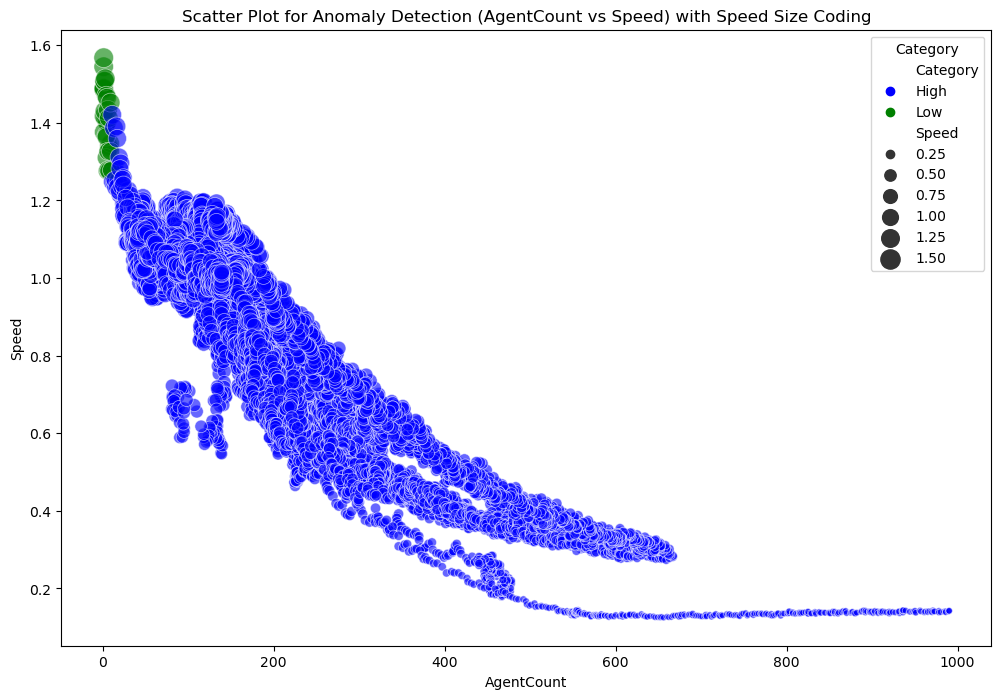

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verify that the 'Category' column exists in the DataFrame
if 'Category' not in df.columns:
    print("The column 'Category' does not exist in the DataFrame.")
else:
    # Scatter plot for anomaly detection with AgentCount and Speed
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='AgentCount', y='Speed', hue='Category', size='Speed', sizes=(20, 200), data=df, palette=['blue', 'green'], alpha=0.6)
    plt.title('Scatter Plot for Anomaly Detection (AgentCount vs Speed) with Speed Size Coding')
    plt.xlabel('AgentCount')
    plt.ylabel('Speed')
    plt.legend(title='Category', loc='upper right')
    plt.show()


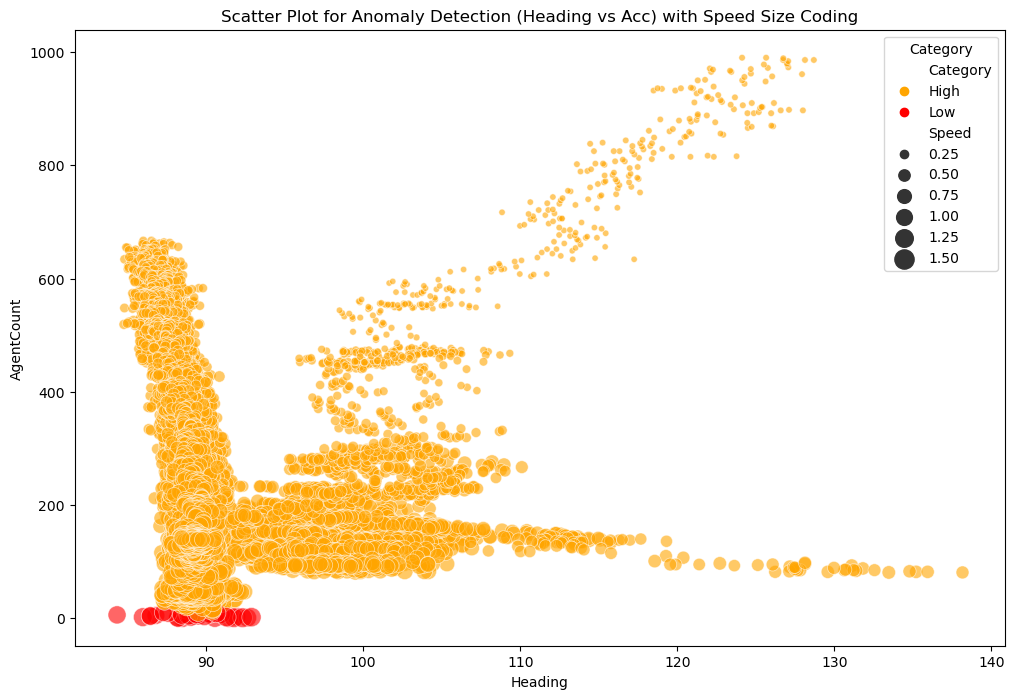

In [13]:
# Scatter plot for anomaly detection with Heading and Acc
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Heading', y='AgentCount', hue='Category', size='Speed', sizes=(20, 200), data=df, palette=['orange', 'red'], alpha=0.6)
plt.title('Scatter Plot for Anomaly Detection (Heading vs Acc) with Speed Size Coding')
plt.xlabel('Heading')
plt.ylabel('AgentCount')
plt.legend(title='Category', loc='upper right')
plt.show()

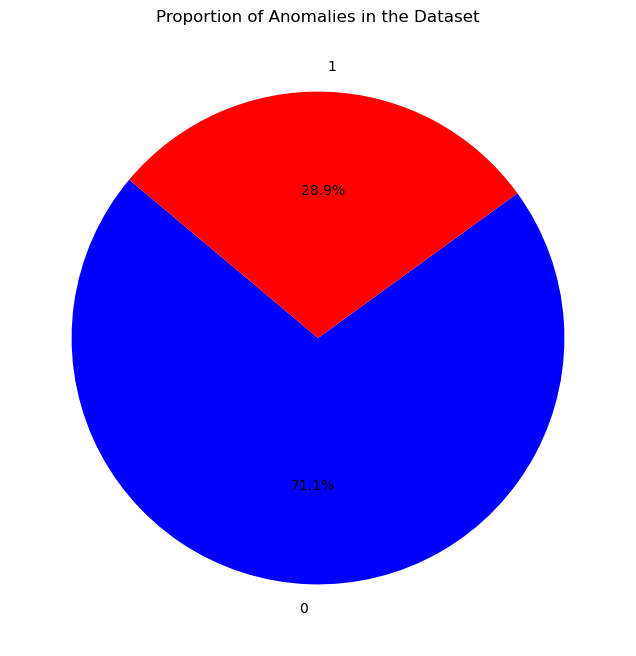

In [14]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
plt.title('Proportion of Anomalies in the Dataset')
plt.show()

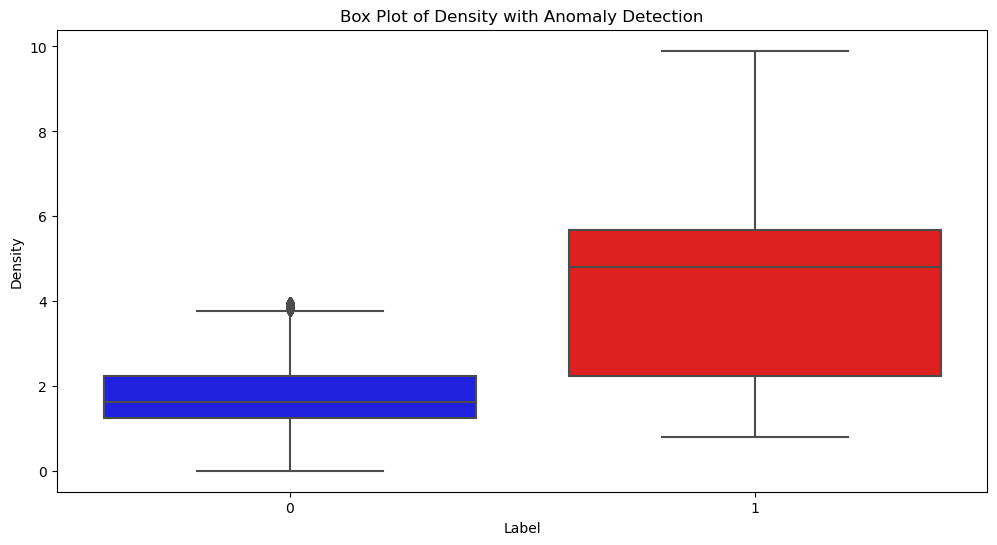

In [15]:
# Convert the label column to categorical if necessary
df['label'] = df['label'].astype('category')

# Create a box plot for the Density column
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='Density', data=df, palette=['blue', 'red'])
plt.title('Box Plot of Density with Anomaly Detection')
plt.xlabel('Label')
plt.ylabel('Density')
plt.show()

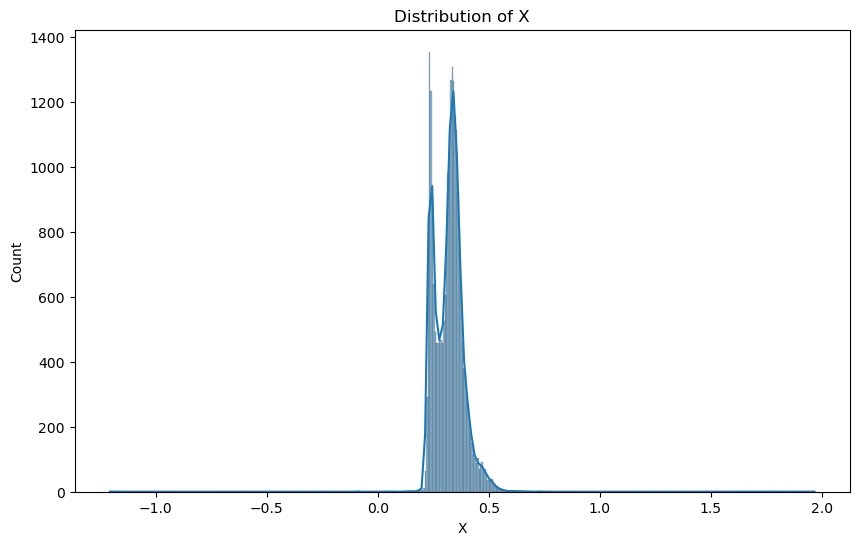

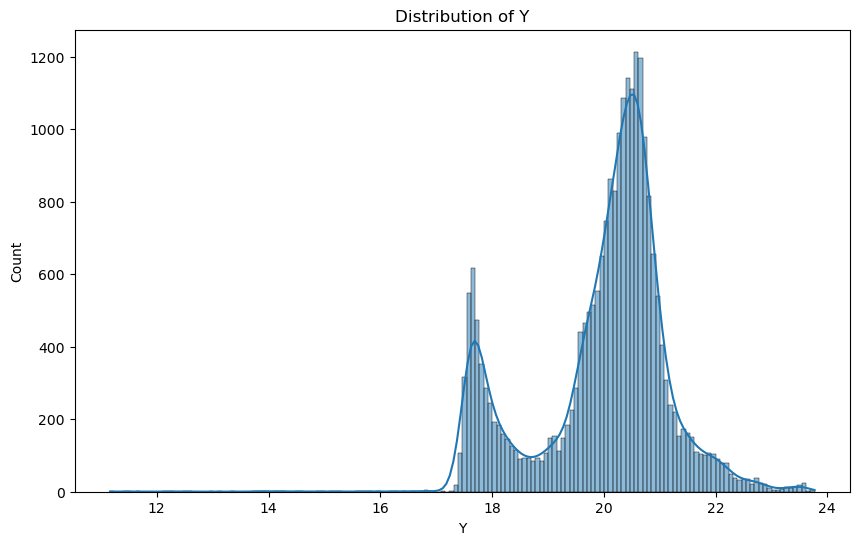

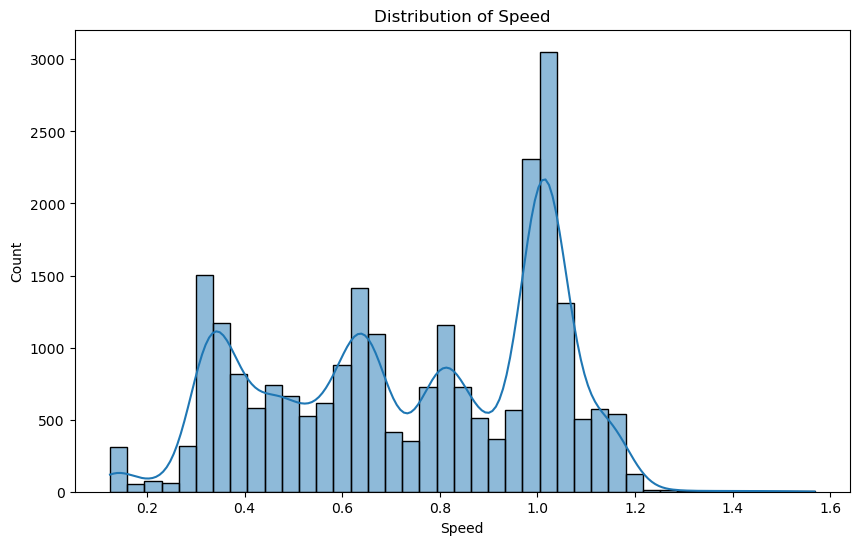

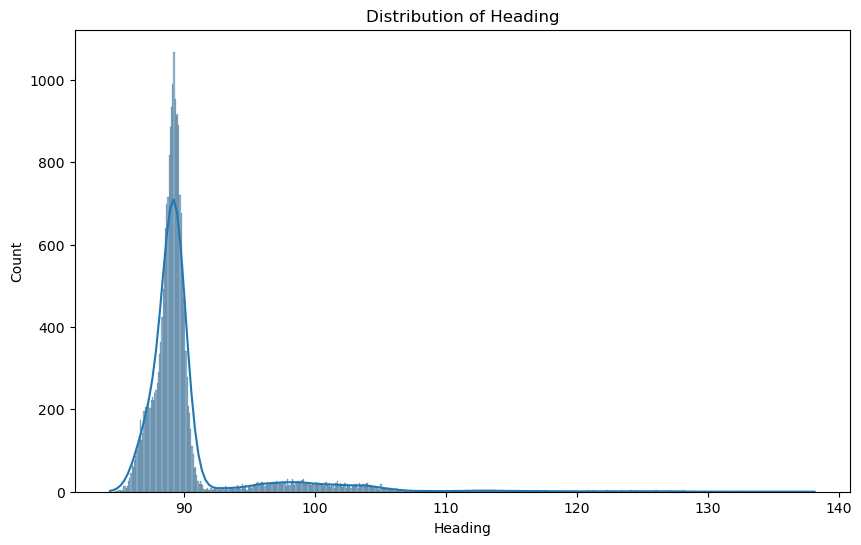

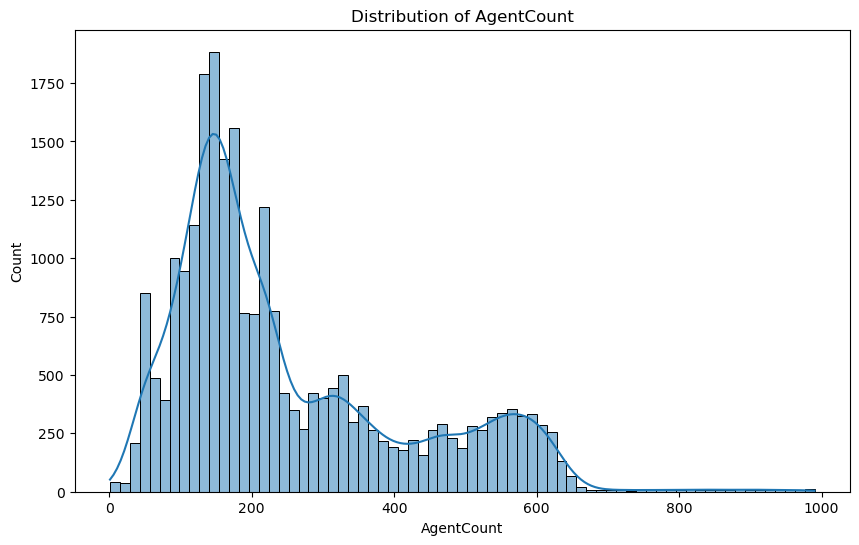

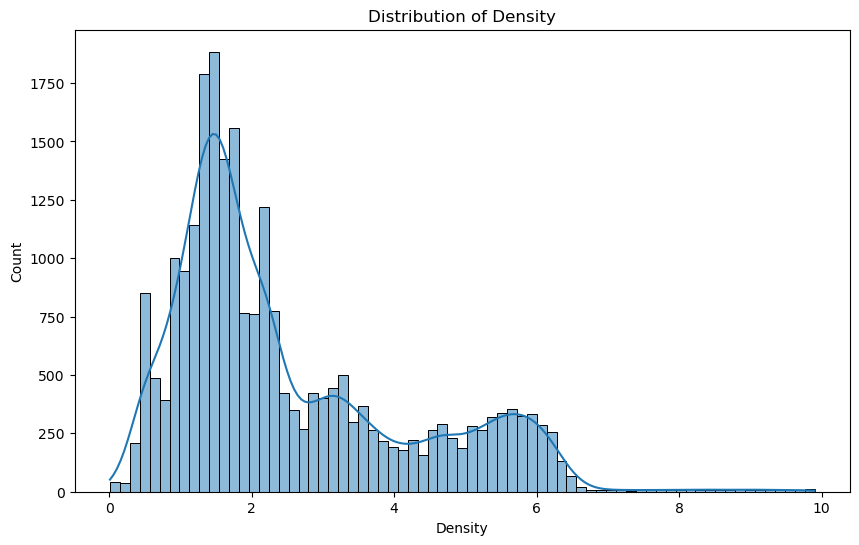

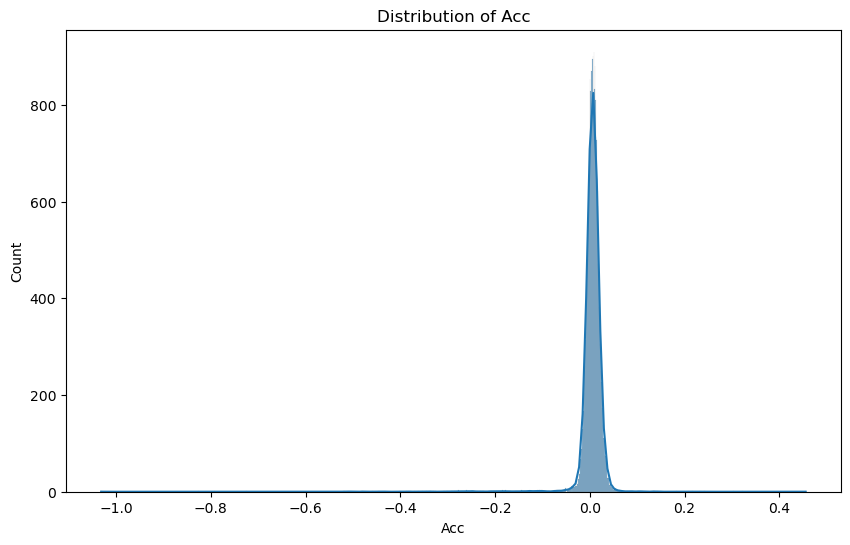

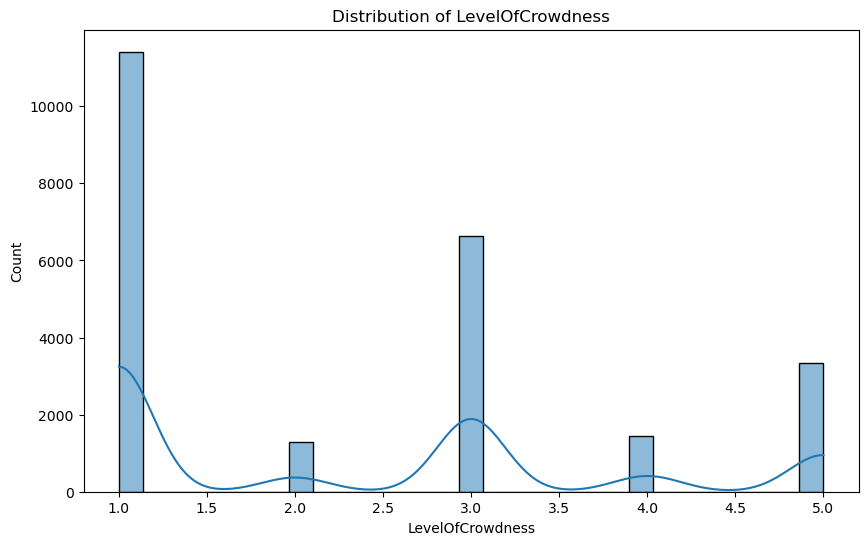

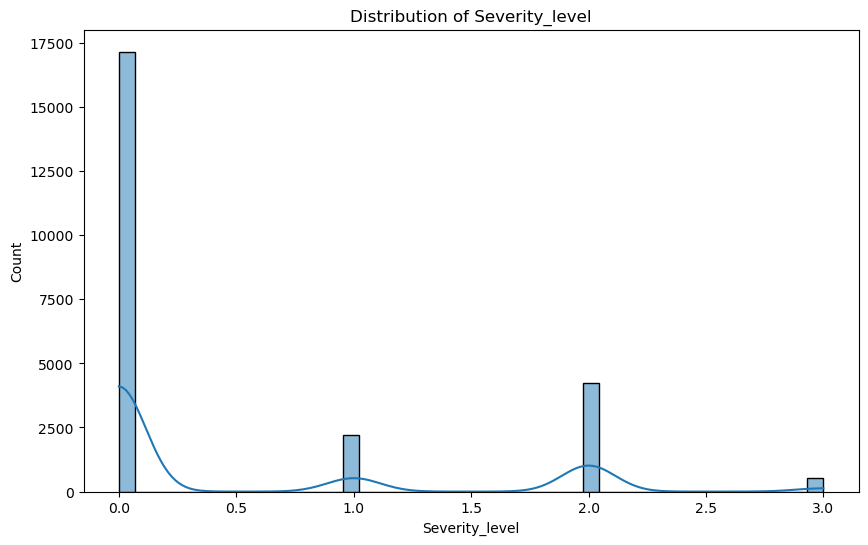

In [16]:
# Plot distribution for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

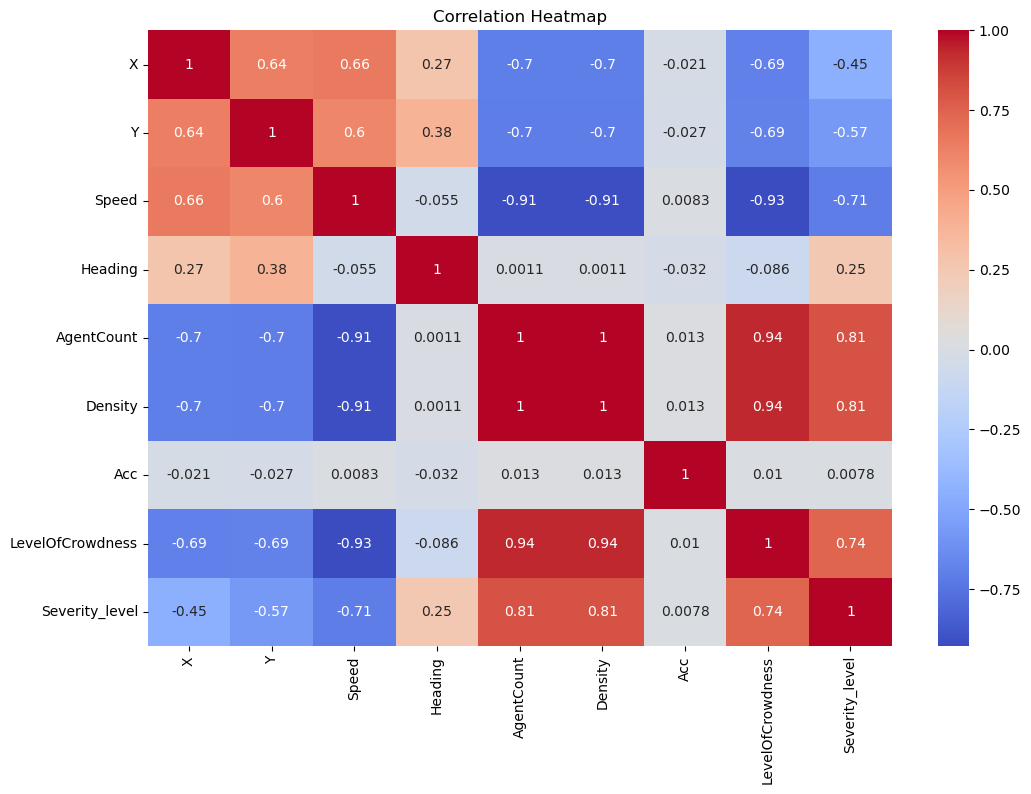

In [17]:
#  heatmap of correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Data Preprocessing

In [18]:
# Check for missing values
df.isnull().sum()

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
Category              0
dtype: int64

In [19]:
df['Acc'].fillna(df['Acc'].mean(), inplace=True)

In [20]:
df.isnull().sum()

timestamp           0
X                   0
Y                   0
Speed               0
Heading             0
AgentCount          0
Density             0
Acc                 0
LevelOfCrowdness    0
label               0
label2              0
Severity_level      0
Category            0
dtype: int64

In [21]:
#check for duplicate values
df.duplicated().sum()

0

In [22]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Ensure all data is numeric and handle non-numeric columns if any
# Convert data to numeric and handle non-numeric columns by dropping or encoding
data_numeric = df.select_dtypes(include=[float, int])  # Select only numeric columns

# Standardize the data
standardized_data = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

# Display the first few rows of the standardized dataset
print(standardized_data.head())


          X         Y     Speed   Heading  AgentCount   Density       Acc  \
0  1.520675 -0.723185  1.432952 -0.248261   -1.014795 -1.014795 -0.212691   
1  0.749318 -0.395174  1.448705 -0.149296   -1.002863 -1.002863 -0.212691   
2  1.186075 -0.130874  1.445125 -0.171591   -0.984965 -0.984965 -0.286634   
3  0.872202  0.040846  1.464815 -0.229505   -0.973032 -0.973032 -0.157233   
4  1.233452  0.392500  1.456939 -0.221219   -0.973032 -0.973032 -0.166476   

   LevelOfCrowdness  Severity_level  
0         -0.918124       -0.594115  
1         -0.918124       -0.594115  
2         -0.918124       -0.594115  
3         -0.918124       -0.594115  
4         -0.918124       -0.594115  


In [23]:
# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                         X         Y     Speed   Heading  AgentCount  \
X                 1.000000  0.635939  0.658514  0.274861   -0.696405   
Y                 0.635939  1.000000  0.602989  0.382209   -0.703409   
Speed             0.658514  0.602989  1.000000 -0.054522   -0.914923   
Heading           0.274861  0.382209 -0.054522  1.000000    0.001107   
AgentCount       -0.696405 -0.703409 -0.914923  0.001107    1.000000   
Density          -0.696405 -0.703409 -0.914923  0.001107    1.000000   
Acc              -0.020906 -0.026881  0.008276 -0.031561    0.012882   
LevelOfCrowdness -0.689679 -0.686265 -0.929420 -0.086456    0.935304   
Severity_level   -0.452958 -0.570184 -0.705815  0.253543    0.807239   

                   Density       Acc  LevelOfCrowdness  Severity_level  
X                -0.696405 -0.020906         -0.689679       -0.452958  
Y                -0.703409 -0.026881         -0.686265       -0.570184  
Speed            -0.914923  0.008276         -0.929420      

In [24]:
correlation_matrix = standardized_data.corr()

correlation_threshold = 0.8

high_corr_features = correlation_matrix.index[correlation_matrix.abs().sum() > correlation_threshold]

# Print highly correlated features
print("Highly correlated features:")
print(high_corr_features)

filtered_data = standardized_data[high_corr_features]

print(filtered_data.head())


Highly correlated features:
Index(['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc',
       'LevelOfCrowdness', 'Severity_level'],
      dtype='object')
          X         Y     Speed   Heading  AgentCount   Density       Acc  \
0  1.520675 -0.723185  1.432952 -0.248261   -1.014795 -1.014795 -0.212691   
1  0.749318 -0.395174  1.448705 -0.149296   -1.002863 -1.002863 -0.212691   
2  1.186075 -0.130874  1.445125 -0.171591   -0.984965 -0.984965 -0.286634   
3  0.872202  0.040846  1.464815 -0.229505   -0.973032 -0.973032 -0.157233   
4  1.233452  0.392500  1.456939 -0.221219   -0.973032 -0.973032 -0.166476   

   LevelOfCrowdness  Severity_level  
0         -0.918124       -0.594115  
1         -0.918124       -0.594115  
2         -0.918124       -0.594115  
3         -0.918124       -0.594115  
4         -0.918124       -0.594115  


In [25]:
# Convert categorical columns to numerical if necessary (label encoding, one-hot encoding)
df['LevelOfCrowdness'] = df['LevelOfCrowdness'].astype('category').cat.codes

# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
high_corr_threshold = 0.9
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)
print("Highly correlated features (correlation > 0.9):", high_corr_features)
data_reduced = df.drop(columns=high_corr_features)

# Select only numeric columns for variance analysis
numeric_cols = data_reduced.select_dtypes(include=[np.number]).columns

# Variance Analysis
low_variance_threshold = 0.01
low_variance_features = [column for column in numeric_cols if data_reduced[column].var() < low_variance_threshold]
print("Low variance features (variance < 0.01):", low_variance_features)
data_reduced = data_reduced.drop(columns=low_variance_features)

# Check the remaining features
print(data_reduced.columns)

Highly correlated features (correlation > 0.9): {'LevelOfCrowdness', 'AgentCount', 'Density'}
Low variance features (variance < 0.01): ['X', 'Acc']
Index(['timestamp', 'Y', 'Speed', 'Heading', 'label', 'label2',
       'Severity_level', 'Category'],
      dtype='object')


# Feature Engineering

In [26]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S')

# Extract hour, minute, and second from timestamp
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

In [27]:
df

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level,Category,hour,minute,second
0,1900-01-01 00:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,0,0,normal,0,High,0,5,36
1,1900-01-01 00:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,0,0,normal,0,High,0,5,37
2,1900-01-01 00:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,0,0,normal,0,High,0,5,38
3,1900-01-01 00:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,0,0,normal,0,High,0,5,39
4,1900-01-01 00:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,0,0,normal,0,High,0,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24118,1900-01-01 00:14:55,0.3559,20.4337,0.9835,89.1479,139,1.39,-0.0029,0,0,normal,0,High,0,14,55
24119,1900-01-01 00:14:56,0.3657,20.4616,1.0152,88.4519,142,1.42,0.0306,0,0,normal,0,High,0,14,56
24120,1900-01-01 00:14:57,0.3695,20.4869,1.0084,89.4419,139,1.39,-0.0019,0,0,normal,0,High,0,14,57
24121,1900-01-01 00:14:58,0.3580,20.4423,1.0107,90.5225,139,1.39,0.0130,0,0,normal,0,High,0,14,58


In [28]:
# Create interaction features
df['Speed_Density'] = df['Speed'] * df['Density']
df['Speed_Acc'] = df['Speed'] * df['Acc']
df['Density_Acc'] = df['Density'] * df['Acc']

In [29]:
# Calculate average density per level of crowdness
df['avg_density_per_crowd_level'] = df.groupby('LevelOfCrowdness')['Density'].transform('mean')

# Calculate average speed per agent count
df['avg_speed_per_agent_count'] = df.groupby('AgentCount')['Speed'].transform('mean')

# Skewness check

In [30]:
# List of columns to analyze for skewness
columns_to_analyze = ['Speed', 'AgentCount', 'Density', 'Acc']

In [31]:
# Calculate skewness
skewness = df[columns_to_analyze].skew()

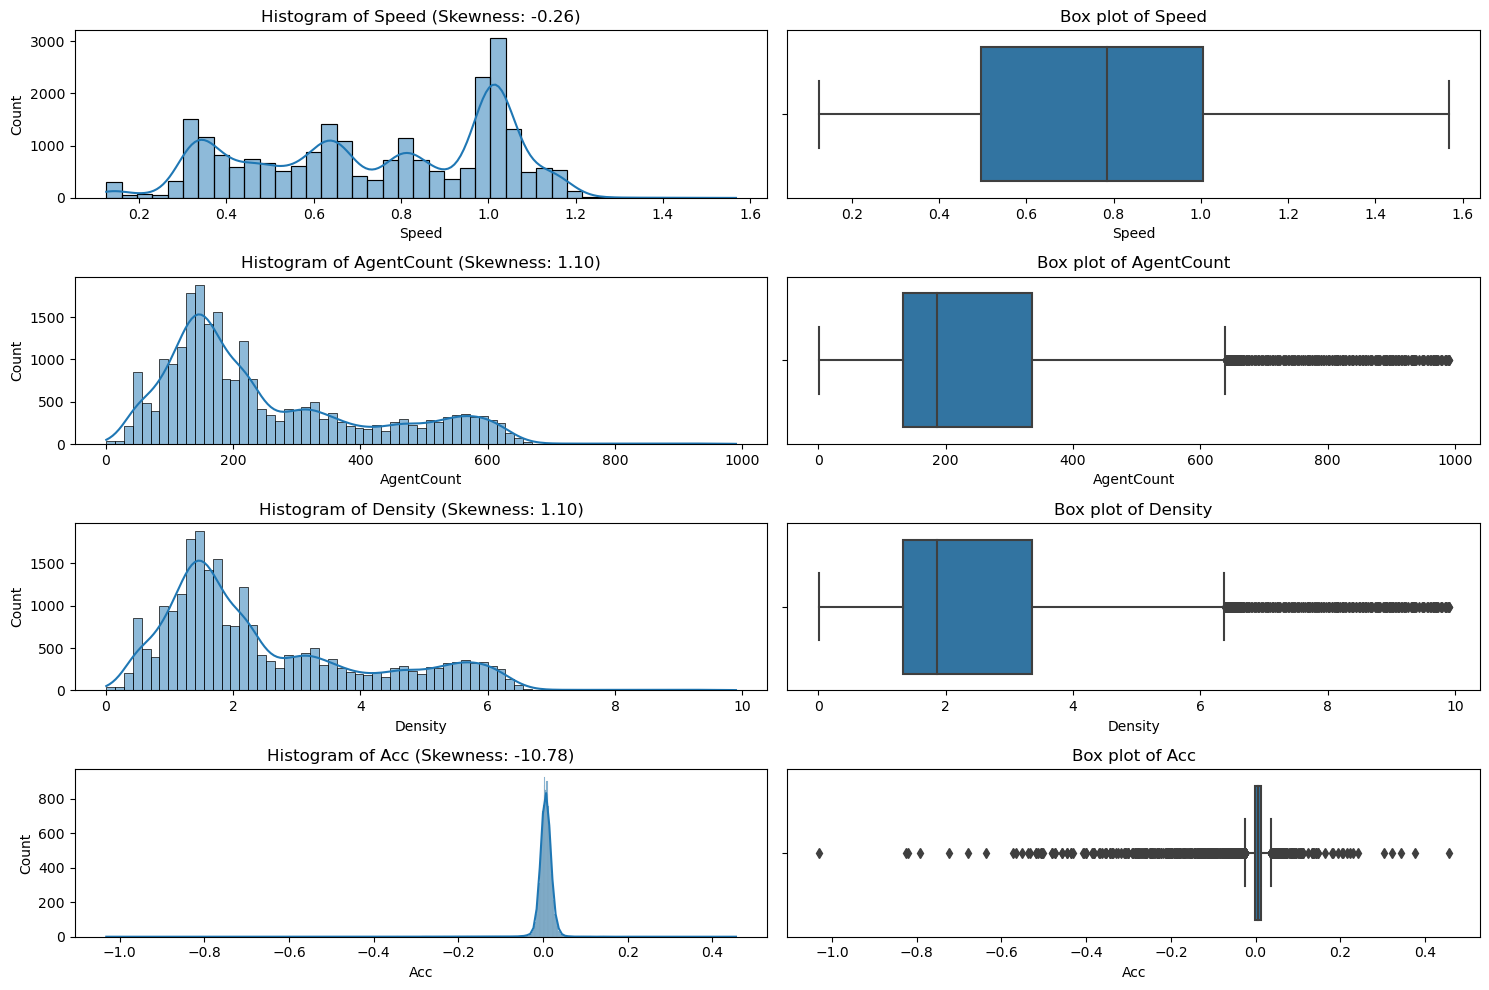

In [32]:
# Plot histograms and box plots
fig, axes = plt.subplots(len(columns_to_analyze), 2, figsize=(15, 10))

for i, column in enumerate(columns_to_analyze):
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column} (Skewness: {skewness[column]:.2f})')
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [33]:
# Print skewness values
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Speed         -0.261571
AgentCount     1.103162
Density        1.103162
Acc          -10.775862
dtype: float64


# Z-Score

Total outliers detected in X using Z-Score: 128
Total outliers detected in Y using Z-Score: 50
Total outliers detected in Speed using Z-Score: 0
Total outliers detected in Heading using Z-Score: 510
Total outliers detected in AgentCount using Z-Score: 140
Total outliers detected in Density using Z-Score: 140
Total outliers detected in Acc using Z-Score: 254
Total outliers detected in LevelOfCrowdness using Z-Score: 0
Total outliers detected in Severity_level using Z-Score: 0
Total outliers detected in hour using Z-Score: 0
Total outliers detected in minute using Z-Score: 0
Total outliers detected in second using Z-Score: 0
Total outliers detected in Speed_Density using Z-Score: 57
Total outliers detected in Speed_Acc using Z-Score: 290
Total outliers detected in Density_Acc using Z-Score: 153
Total outliers detected in avg_density_per_crowd_level using Z-Score: 0
Total outliers detected in avg_speed_per_agent_count using Z-Score: 0


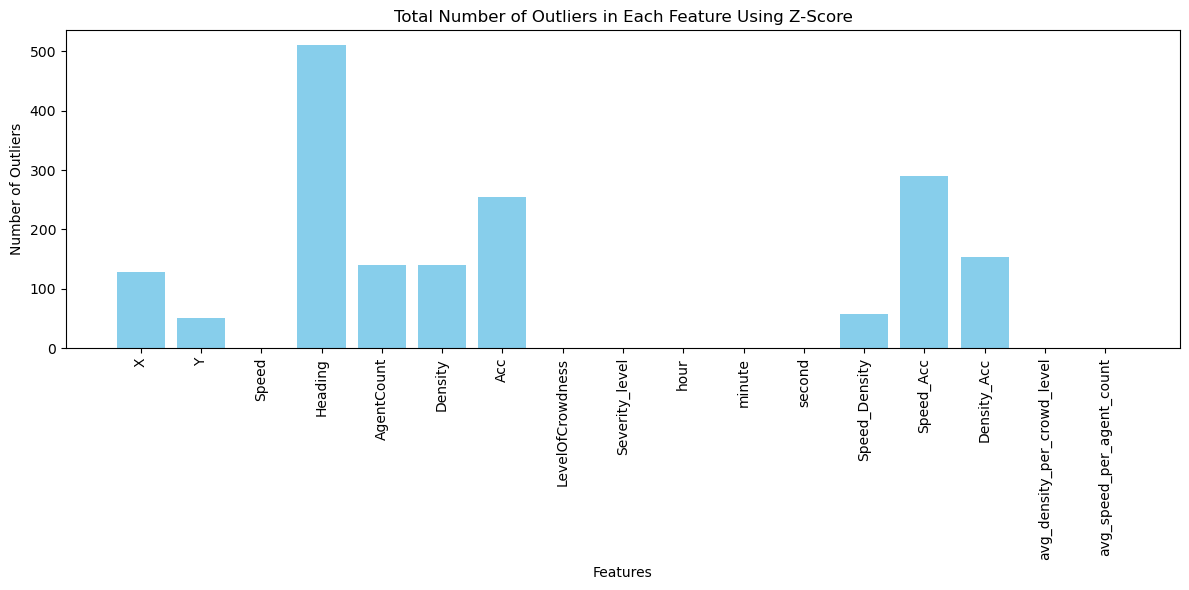

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



# Select only numeric columns for standardization
numeric_columns = df.select_dtypes(include=[np.number]).columns
standardized_data = df[numeric_columns].apply(zscore)

# Z-Score for outlier detection
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = df[column]
    return df[(z_scores > threshold) | (z_scores < -threshold)]

# Detecting outliers for each feature using Z-Score and counting them
outlier_counts = {}
for column in standardized_data.columns:
    outliers = detect_outliers_zscore(standardized_data, column)
    outlier_counts[column] = len(outliers)
    print(f"Total outliers detected in {column} using Z-Score: {outlier_counts[column]}")

# Plotting the total number of outliers in each column
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Total Number of Outliers in Each Feature Using Z-Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# IQR ANALYSIS

Total outliers detected in X using IQR: 280
Total outliers detected in Y using IQR: 3004
Total outliers detected in Speed using IQR: 0
Total outliers detected in Heading using IQR: 3461
Total outliers detected in AgentCount using IQR: 284
Total outliers detected in Density using IQR: 284
Total outliers detected in Acc using IQR: 857
Total outliers detected in LevelOfCrowdness using IQR: 0
Total outliers detected in Severity_level using IQR: 534
Total outliers detected in hour using IQR: 0
Total outliers detected in minute using IQR: 0
Total outliers detected in second using IQR: 0
Total outliers detected in Speed_Density using IQR: 1331
Total outliers detected in Speed_Acc using IQR: 1294
Total outliers detected in Density_Acc using IQR: 2012
Total outliers detected in avg_density_per_crowd_level using IQR: 3346
Total outliers detected in avg_speed_per_agent_count using IQR: 0


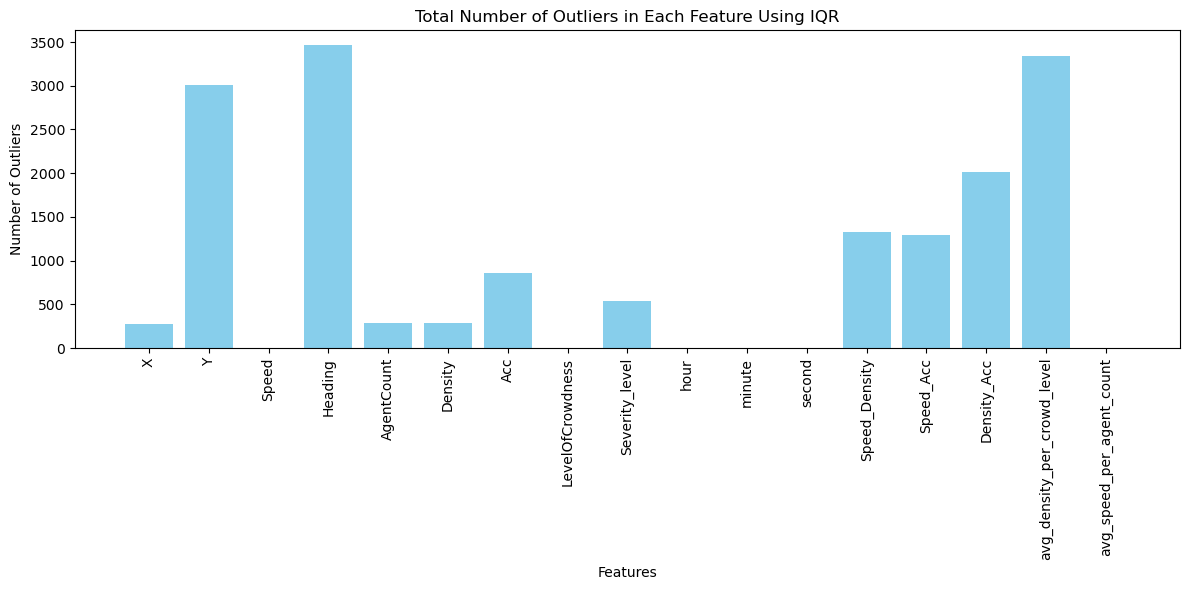

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'standardized_data' is already defined and contains the standardized data

# Interquartile Range (IQR) for outlier detection
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detecting outliers for each feature using IQR and counting them
outlier_counts_iqr = {}
for column in standardized_data.columns:
    outliers = detect_outliers_iqr(standardized_data, column)
    outlier_counts_iqr[column] = len(outliers)
    print(f"Total outliers detected in {column} using IQR: {outlier_counts_iqr[column]}")

# Plotting the total number of outliers in each column
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts_iqr.keys(), outlier_counts_iqr.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Total Number of Outliers in Each Feature Using IQR')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Model Building using KNN

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Verify if 'timestamp' column exists and drop it
if 'timestamp' in df.columns:
    df = df.drop(columns=['timestamp'])
else:
    print("Column 'timestamp' not found in DataFrame")

In [38]:
df

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level,Category,hour,minute,second,Speed_Density,Speed_Acc,Density_Acc,avg_density_per_crowd_level,avg_speed_per_agent_count
0,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,0,0,normal,0,High,0,5,36,0.925992,-0.003087,-0.002187,1.224968,1.076740
1,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,0,0,normal,0,High,0,5,37,0.952508,-0.003099,-0.002241,1.224968,1.062502
2,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,0,0,normal,0,High,0,5,38,0.986076,-0.005848,-0.004386,1.224968,1.036736
3,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,0,0,normal,0,High,0,5,39,1.013848,-0.001037,-0.000792,1.224968,1.055898
4,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,0,0,normal,0,High,0,5,40,1.011912,-0.001380,-0.001056,1.224968,1.055898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24118,0.3559,20.4337,0.9835,89.1479,139,1.39,-0.0029,0,0,normal,0,High,0,14,55,1.367065,-0.002852,-0.004031,1.224968,1.005328
24119,0.3657,20.4616,1.0152,88.4519,142,1.42,0.0306,0,0,normal,0,High,0,14,56,1.441584,0.031065,0.043452,1.224968,1.011713
24120,0.3695,20.4869,1.0084,89.4419,139,1.39,-0.0019,0,0,normal,0,High,0,14,57,1.401676,-0.001916,-0.002641,1.224968,1.005328
24121,0.3580,20.4423,1.0107,90.5225,139,1.39,0.0130,0,0,normal,0,High,0,14,58,1.404873,0.013139,0.018070,1.224968,1.005328


In [39]:
# Encode categorical variables
df['label2'] = df['label2'].astype('category').cat.codes

In [40]:
# Select features and target
X = df[['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness']]
y = df['label2']

In [41]:
# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [42]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [46]:
# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {knn_accuracy}')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9964766839378238
Precision: 0.9982174688057041
Recall: 0.9967368733313556
F1 Score: 0.9974766216416803


In [47]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1454
           1       1.00      1.00      1.00      3371

    accuracy                           1.00      4825
   macro avg       1.00      1.00      1.00      4825
weighted avg       1.00      1.00      1.00      4825



Confusion Matrix:


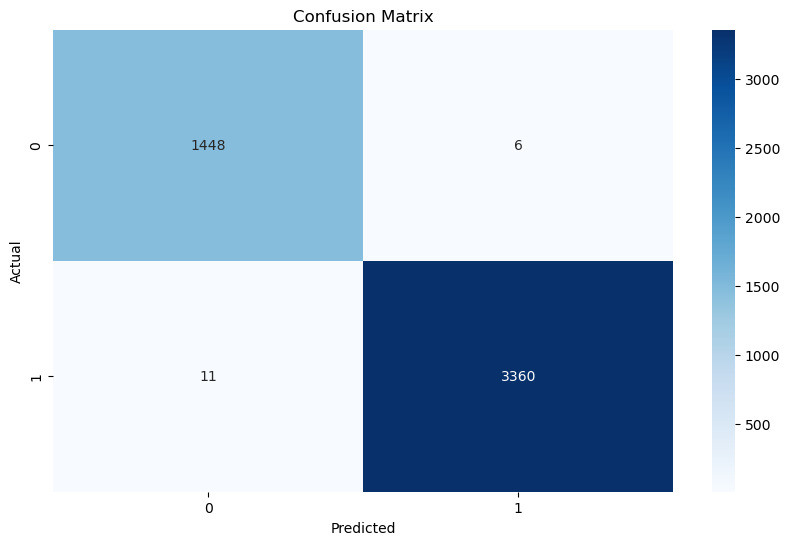

In [48]:
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Isolation Forest

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
data = pd.read_csv('Crowd data for anomaly detection.csv')

# Separate features and target
X = data.drop(columns=['label', 'label2'])  # Adjust as necessary
y = data['label']  # Assuming 'label' indicates normal or anomaly

# Extract numeric columns
X_numeric = data.select_dtypes(include=[np.number])

# Handle missing values
X_numeric = X_numeric.dropna()

# Ensure target variable also excludes these rows
y = y[X_numeric.index]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)  # Adjust test_size

# Initialize and fit the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X_train)

# Predict anomalies on the test set
y_pred_test = clf.predict(X_test)

# Map predictions to binary labels: -1 (anomaly) -> 1, 1 (normal) -> 0
y_pred_test_mapped = np.where(y_pred_test == -1, 1, 0)
y_test_mapped = np.where(y_test == -1, 1, 0)

accuracy = accuracy_score(y_test_mapped, y_pred_test_mapped)
precision = precision_score(y_test_mapped, y_pred_test_mapped, average='binary', zero_division=1)
recall = recall_score(y_test_mapped, y_pred_test_mapped, average='binary', zero_division=1)
f1 = f1_score(y_test_mapped, y_pred_test_mapped, average='binary', zero_division=1)

print(f"Test accuracy: {accuracy:.3f}")
print(f"Test precision: {precision:.3f}")
print(f"Test recall: {recall:.3f}")
print(f"Test F1 score: {f1:.3f}")

print(classification_report(y_test_mapped, y_pred_test_mapped))
print(confusion_matrix(y_test_mapped, y_pred_test_mapped))

Test accuracy: 0.948
Test precision: 0.000
Test recall: 1.000
Test F1 score: 0.000
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2402
           1       0.00      0.00      0.00         0

    accuracy                           0.95      2402
   macro avg       0.50      0.47      0.49      2402
weighted avg       1.00      0.95      0.97      2402

[[2278  124]
 [   0    0]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.3, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

# Convert predictions from {1, -1} to {0, 1}
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

# Evaluate the model
iso_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print evaluation metrics
print("Accuracy:", iso_accuracy)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Visualization of Anomaly Scores
anomaly_scores = iso_forest.decision_function(X_test)




print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Accuracy: 0.9104912572855953
Precision: 0.8286852589641435
Recall: 0.8788732394366198
F1-Score: 0.8530416951469583
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1692
           1       0.83      0.88      0.85       710

    accuracy                           0.91      2402
   macro avg       0.89      0.90      0.89      2402
weighted avg       0.91      0.91      0.91      2402

[[1563  129]
 [  86  624]]


# Local Outlier Factor

In [51]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

# Load the data
data = pd.read_csv('Crowd data for anomaly detection.csv')

# Drop rows with missing true labels ('label2')
data = data.dropna(subset=['label2'])

# Convert 'normal' to 0 and 'anomaly' to 1 in the 'label2' column
label_mapping = {'normal': 0, 'anomaly': 1}
data['label2'] = data['label2'].map(label_mapping).fillna(0)

# Selecting features for model training
features = ['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness']
X = data[features]
y = data['label2']

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Feature selection using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_scaled, y)
feat_importances = pd.Series(model.feature_importances_, index=features)
important_features = feat_importances.nlargest(5).index.tolist()

# Using only the important features
X_important = data[important_features]

# Impute and scale the important features
X_important_imputed = imputer.fit_transform(X_important)
X_important_scaled = scaler.fit_transform(X_important_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important_scaled, y, test_size=0.2, random_state=42)

# Define the LocalOutlierFactor model with adjusted parameters
lof = LocalOutlierFactor(n_neighbors=35, contamination=0.2, novelty=True)

# Fit the model on the training data
lof.fit(X_train)

# Predict anomalies on the testing data
y_pred = lof.predict(X_test)

# Convert predictions from {-1, 1} to {0, 1}
anomalies = np.where(y_pred == -1, 1, 0)

# Evaluate the model
lof_accuracy = accuracy_score(y_test, anomalies)
precision = precision_score(y_test, anomalies, zero_division=1)
recall = recall_score(y_test, anomalies, zero_division=1)
f1 = f1_score(y_test, anomalies, zero_division=1)
report = classification_report(y_test, anomalies, zero_division=1)

# Print evaluation metrics
print("Accuracy:", lof_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, anomalies)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.635440414507772
Precision: 0.35063663075416257
Recall: 0.24621733149931224
F1-Score: 0.28929292929292927

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      3371
           1       0.35      0.25      0.29      1454

    accuracy                           0.64      4825
   macro avg       0.53      0.52      0.52      4825
weighted avg       0.60      0.64      0.61      4825


Confusion Matrix:
 [[2708  663]
 [1096  358]]


In [52]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier



# Feature selection using ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X_scaled, y)
feat_importances = pd.Series(model.feature_importances_, index=features)
important_features = feat_importances.nlargest(5).index.tolist()

# Using only the important features
X_important = data[important_features]

# Impute and scale the important features
X_important_imputed = imputer.fit_transform(X_important)
X_important_scaled = scaler.fit_transform(X_important_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important_scaled, y, test_size=0.2, random_state=42)

# Define a range of parameters to test for LocalOutlierFactor
best_accuracy = 0
best_n_neighbors = 0
best_contamination = 0

for n_neighbors in range(10, 51, 5):
    for contamination in np.arange(0.1, 0.31, 0.05):
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=True)
        lof.fit(X_train)
        y_pred = lof.predict(X_test)
        anomalies = np.where(y_pred == -1, 1, 0)
        accuracy = accuracy_score(y_test, anomalies)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_neighbors = n_neighbors
            best_contamination = contamination

# Use the best parameters found
lof = LocalOutlierFactor(n_neighbors=best_n_neighbors, contamination=best_contamination, novelty=True)
lof.fit(X_train)

# Predict anomalies on the testing data
y_pred = lof.predict(X_test)

# Convert predictions from {-1, 1} to {0, 1}
anomalies = np.where(y_pred == -1, 1, 0)

# Evaluate the model
accuracy = accuracy_score(y_test, anomalies)
precision = precision_score(y_test, anomalies, zero_division=1)
recall = recall_score(y_test, anomalies, zero_division=1)
f1 = f1_score(y_test, anomalies, zero_division=1)
report = classification_report(y_test, anomalies, zero_division=1)

# Print evaluation metrics
print("Best n_neighbors:", best_n_neighbors)
print("Best contamination:", best_contamination)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, anomalies)
print("\nConfusion Matrix:\n", conf_matrix)

Best n_neighbors: 35
Best contamination: 0.1
Accuracy: 0.6615544041450777
Precision: 0.3199195171026157
Recall: 0.109353507565337
F1-Score: 0.1629933367503844

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79      3371
           1       0.32      0.11      0.16      1454

    accuracy                           0.66      4825
   macro avg       0.51      0.50      0.48      4825
weighted avg       0.59      0.66      0.60      4825


Confusion Matrix:
 [[3033  338]
 [1295  159]]


# SVM

In [53]:
from sklearn.svm import SVC
# instantiate the estimator
svm = SVC()

# fit the model
svm.fit(X_train, y_train)

# predict the response
pred_svm = svm.predict(X_test)

# accuracy score
svm_acc = accuracy_score(y_test, pred_svm)
print ("Accuracy for SVM: {}".format(svm_acc))

Accuracy for SVM: 0.9987564766839379


In [54]:
# Precision score
svm_precision = precision_score(y_test, pred_svm)
print("Precision for SVM: {:.4f}".format(svm_precision))

# Recall score
svm_recall = recall_score(y_test, pred_svm)
print("Recall for SVM: {:.4f}".format(svm_recall))

# F1 score
svm_f1 = f1_score(y_test, pred_svm)
print("F1 Score for SVM: {:.4f}".format(svm_f1))

Precision for SVM: 0.9966
Recall for SVM: 0.9993
F1 Score for SVM: 0.9979


In [55]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, pred_svm))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3371
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      4825
   macro avg       1.00      1.00      1.00      4825
weighted avg       1.00      1.00      1.00      4825

Confusion Matrix:
[[3366    5]
 [   1 1453]]


# Decision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [57]:
# Initialize DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

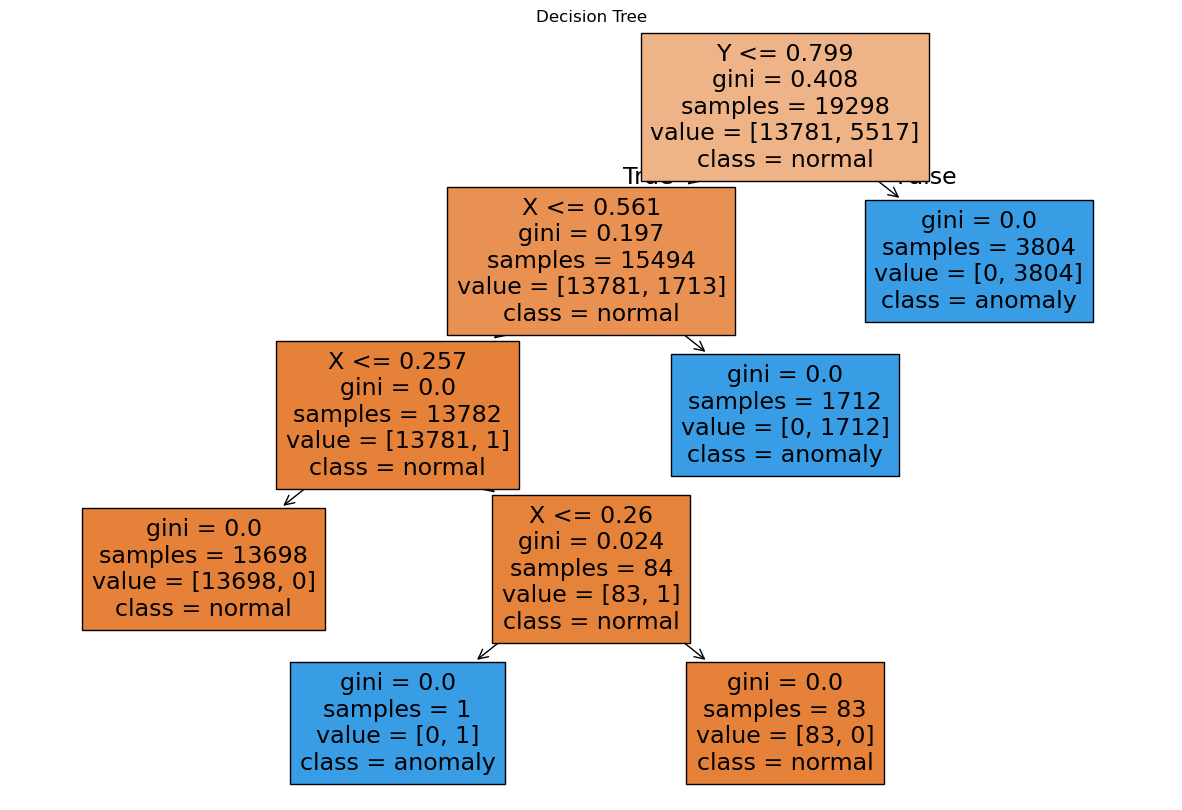

In [58]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['normal', 'anomaly'])
plt.title("Decision Tree")
plt.show()


In [59]:
# Make predictions
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
dec_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print(f"Accuracy: {dec_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9996
Precision: 1.0000
Recall: 0.9986
F1 Score: 0.9993
Confusion Matrix:
[[3371    0]
 [   2 1452]]


# CNN

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical

In [61]:
# Reshape data for CNN
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

In [62]:
# Convert labels to categorical
y_cat = to_categorical(y)

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

In [64]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9363 - loss: 0.1930 - val_accuracy: 0.9890 - val_loss: 0.0354
Epoch 2/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9865 - loss: 0.0357 - val_accuracy: 0.9927 - val_loss: 0.0213
Epoch 3/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9897 - loss: 0.0236 - val_accuracy: 0.9944 - val_loss: 0.0159
Epoch 4/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9916 - loss: 0.0202 - val_accuracy: 0.9961 - val_loss: 0.0151
Epoch 5/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9920 - loss: 0.0204 - val_accuracy: 0.9961 - val_loss: 0.0096
Epoch 6/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9920 - loss: 0.0172 - val_accuracy: 0.9969 - val_loss: 0.0097
Epoch 7/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9950 - loss: 0.0119 - val_accuracy: 0.9940 - val_loss: 0.0192
Epoch 8/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9938 - loss: 0.0184 - val_accuracy: 0.

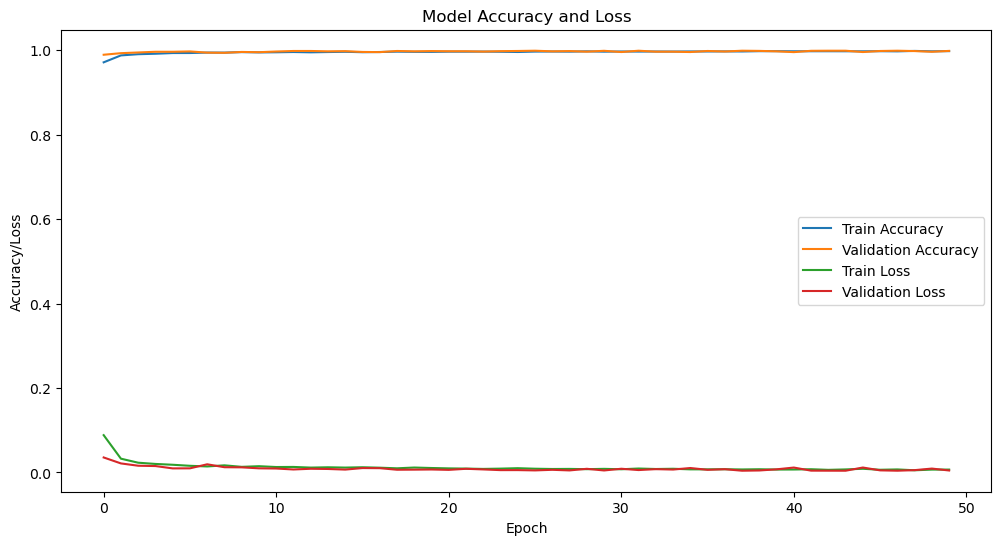

In [67]:
# Plot model accuracy and loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [ ]:
****The training and validation accuracy curves above merge into one, it usually indicates that the model has learned to generalize well from the training data to the validation data. This is generally a desirable situation, as it implies that the model is neither overfitting nor underfitting.
****The model is performing consistently on both training and validation data, suggesting good generalization.
**** This tells us to stop further training as the model has likely reached an optimal performance level.

In [68]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [69]:
# Evaluate the model
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
cnn_accuracy = accuracy_score(y_true, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {cnn_accuracy:.4f}")


Precision: 0.9959
Recall: 0.9979
F1 Score: 0.9969
Accuracy: 0.9981


Confusion Matrix:
[[3365    6]
 [   3 1451]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3371
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      4825
   macro avg       1.00      1.00      1.00      4825
weighted avg       1.00      1.00      1.00      4825



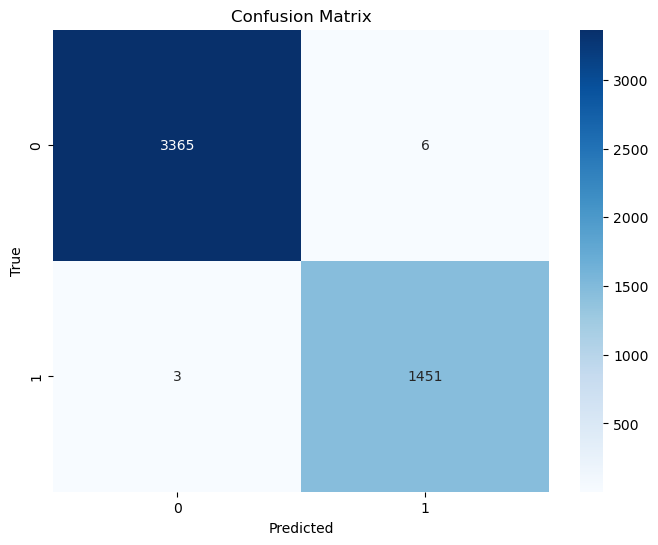

In [70]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K-Means

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load your data into a DataFrame
# df = pd.read_csv('your_dataset.csv') # Replace with your dataset

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline that includes the preprocessor and the KMeans model
n_clusters = 2  # Choose the number of clusters
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=n_clusters, random_state=42))
])

# Fit the pipeline to the data
pipeline.fit(df)

# Predict cluster labels
cluster_labels = pipeline.predict(df)

# Identify the smallest cluster as anomalies
cluster_sizes = np.bincount(cluster_labels)
anomaly_cluster = np.argmin(cluster_sizes)
anomalies = (cluster_labels == anomaly_cluster).astype(int)

# Evaluation (assuming 'target' is binary with 1 for anomalies and 0 for normal points)
y_true = df['label'].values
y_pred = anomalies

k_accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {k_accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')


Accuracy: 0.905
Precision: 0.981
Recall: 0.686
F1 Score: 0.807


In [73]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred)
print("\nClassification Report:\n", class_report)



Confusion Matrix:
 [[17057    95]
 [ 2191  4780]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     17152
           1       0.98      0.69      0.81      6971

    accuracy                           0.91     24123
   macro avg       0.93      0.84      0.87     24123
weighted avg       0.91      0.91      0.90     24123



# Comparison of Models 

In [74]:
models = pd.DataFrame([svm_acc,dec_accuracy,cnn_accuracy,iso_accuracy,k_accuracy,knn_accuracy],
             index=['SVM', 'Decision tree', 'CNN', 'Isolation forest', 'K-Means', 'KNN'],columns=['accuracy'])

models.sort_values('accuracy', ascending=False)

,accuracy
Decision tree,0.999585
SVM,0.998756
CNN,0.998135
KNN,0.996477
Isolation forest,0.910491
K-Means,0.905236


In [75]:
models.accuracy.sort_values(ascending=False).values

array([0.99958549, 0.99875648, 0.99813472, 0.99647668, 0.91049126,
       0.90523567])

<Axes: >

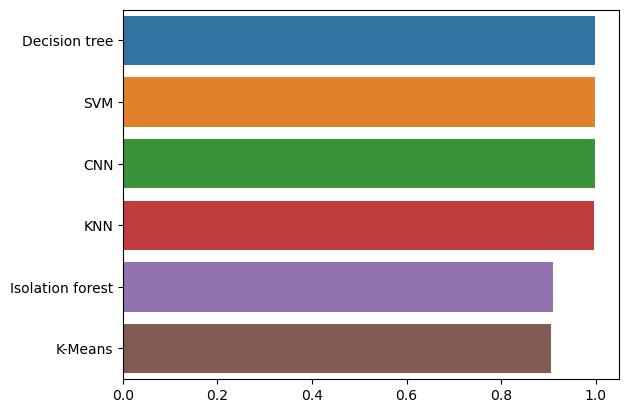

In [76]:
sns.barplot(x = models.accuracy.sort_values(ascending=False).values, 
            y = models.accuracy.sort_values(ascending=False).index)

In [ ]:
***In conclusion, Isolation forest is the best fit generalized model for this dataset in unsupervised learning.